In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving Parcial_2024_1.xlsx to Parcial_2024_1.xlsx


# Modelo 1 capa



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR: 0.01, Reg: None, Patience: 10, Neurons: 6 (Single Layer) - Recall: 0.6484
LR: 0.01, Reg: None, Patience: 10, Neurons: 7 (Single Layer) - Recall: 0.5938
LR: 0.01, Reg: None, Patience: 10, Neurons: 4 (Single Layer) - Recall: 0.5469
LR: 0.01, Reg: None, Patience: 10, Neurons: 5 (Single Layer) - Recall: 0.5469
LR: 0.01, Reg: None, Patience: 10, Neurons: 8 (Single Layer) - Recall: 0.5391


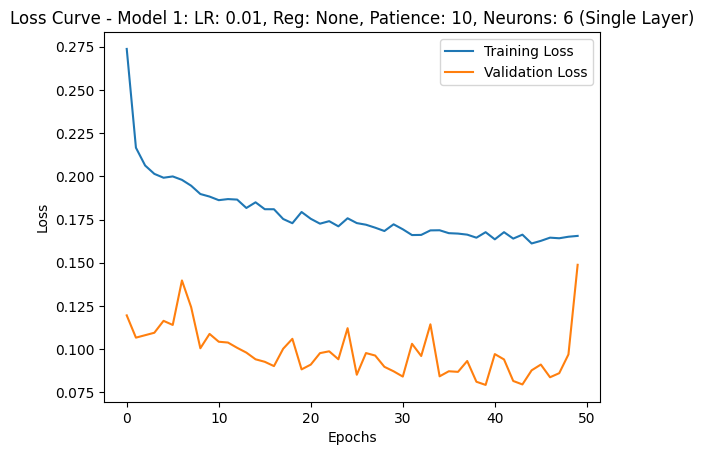

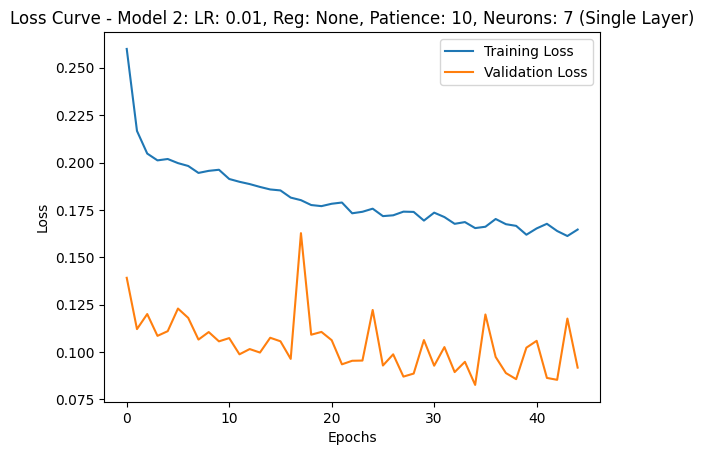

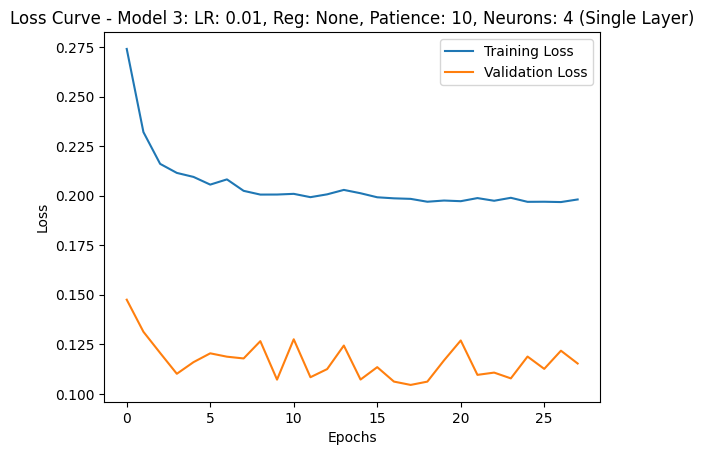

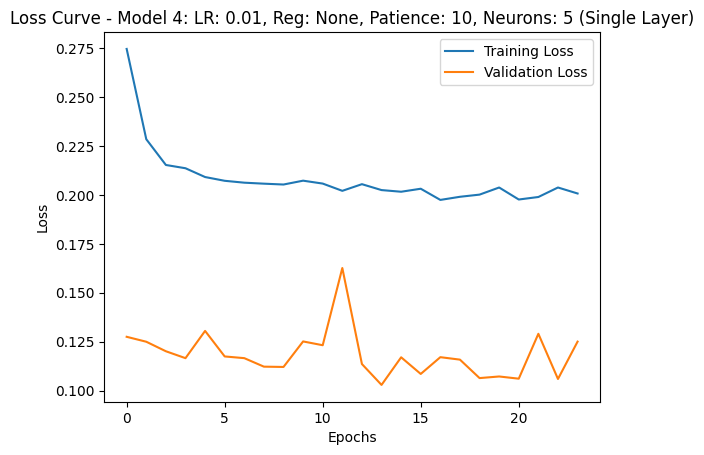

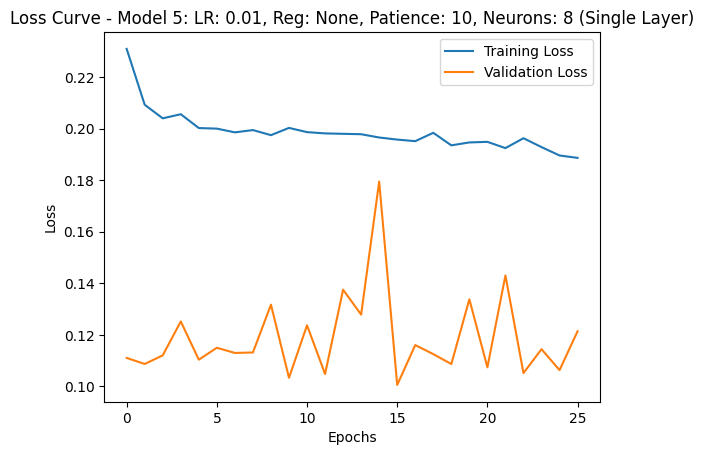

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 1:
 - Recall: 0.6484
 - MSE: 0.0864
 - MAE: 0.1601
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


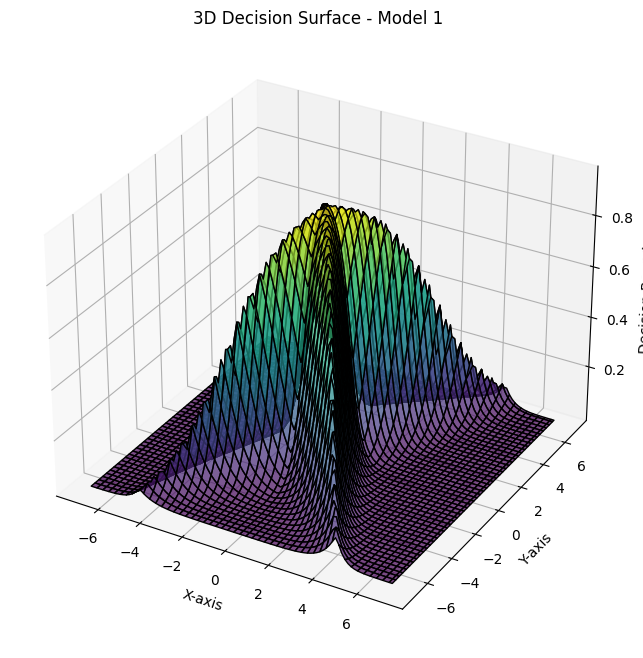

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2:
 - Recall: 0.5938
 - MSE: 0.0916
 - MAE: 0.1711
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


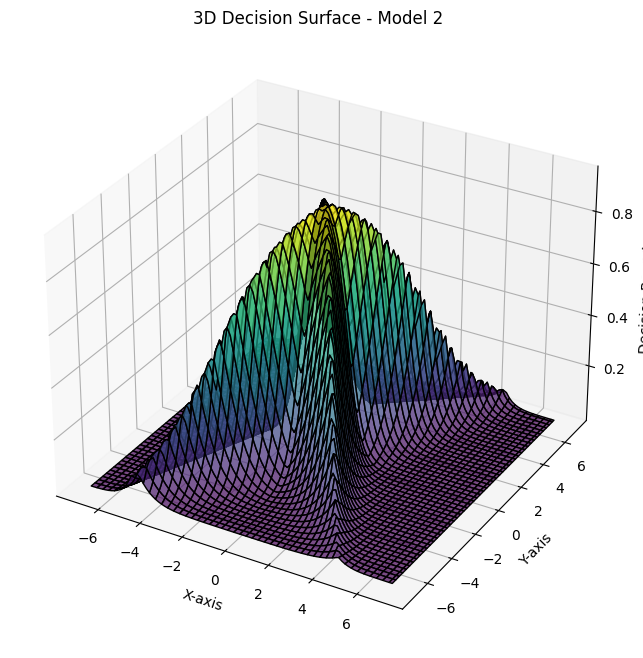

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 3:
 - Recall: 0.5469
 - MSE: 0.1098
 - MAE: 0.2236
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


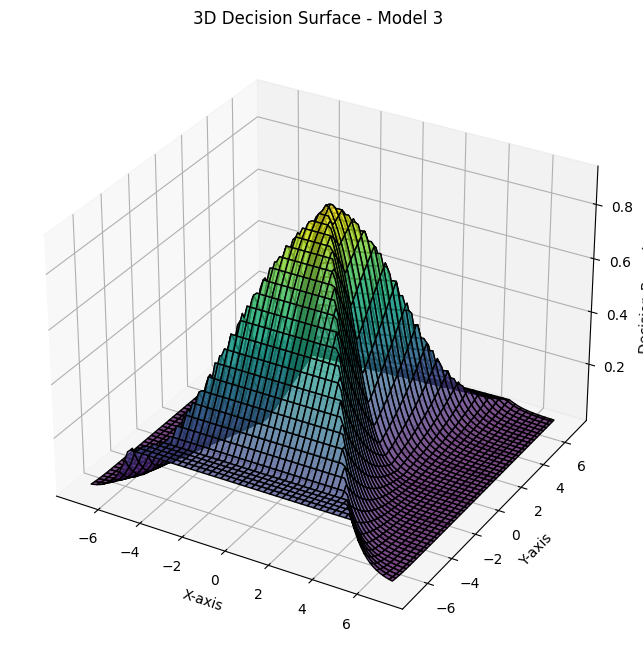

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 4:
 - Recall: 0.5469
 - MSE: 0.1131
 - MAE: 0.2316
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


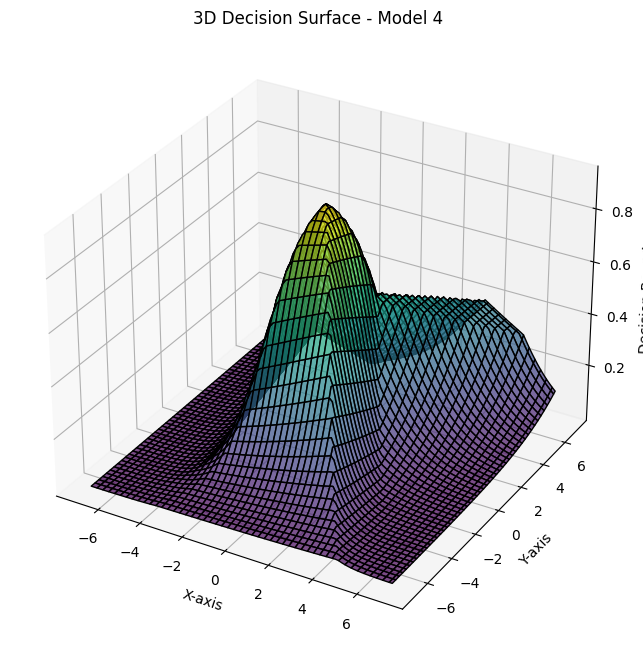

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 5:
 - Recall: 0.5391
 - MSE: 0.1043
 - MAE: 0.2265
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


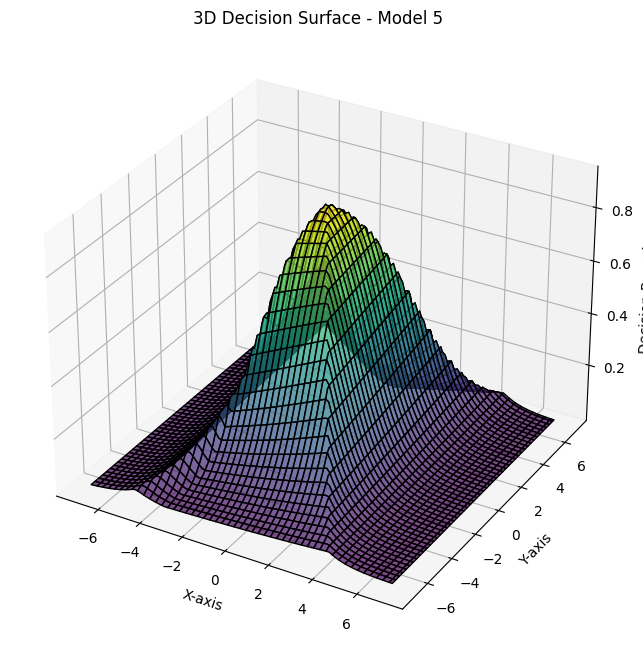

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

# Step 2: Load the dataset
data = pd.read_excel('Parcial_2024_1.xlsx')

# Step 3: Prepare input (X) and output (y) data
X = data[['X', 'Y']].values
y = data['Z'].values

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
neuron_range = range(4, 9)
learning_rates = [0.01]
regularizers = [None]
patience_values = [10]

# Track top 5 configurations
top_5_models = []

# Define class weights to prioritize recall
class_weights = {0: 1, 1: 3}

# Iterate through configurations
for lr in learning_rates:
    for reg in regularizers:
        for patience in patience_values:
            # Single hidden layer
            for neurons in neuron_range:
                config_name = f"LR: {lr}, Reg: {reg}, Patience: {patience}, Neurons: {neurons} (Single Layer)"

                model = Sequential()
                model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=reg))
                model.add(Dense(1, activation='sigmoid'))

                adam = Adam(learning_rate=lr)
                model.compile(optimizer=adam, loss='mse', metrics=[Recall()])

                early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

                history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1,
                                    callbacks=[early_stopping], class_weight=class_weights, verbose=0)

                # Evaluate model on test set
                results = model.evaluate(X_test, y_test, verbose=0)
                mse, recall = results[0], results[1]

                top_5_models.append((recall, model, history, neurons, lr, reg, patience, "Single Layer", config_name))
                top_5_models = sorted(top_5_models, key=lambda x: x[0], reverse=True)[:5]


# Display results for top 5 configurations
for model_info in top_5_models:
    recall, model, history, neurons, lr, reg, patience, layer_type, config_name = model_info
    print(f"{config_name} - Recall: {recall:.4f}")

# Plot the loss curve for each of the top 5 models
for i, (recall, model, history, *_, config_name) in enumerate(top_5_models):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve - Model {i+1}: {config_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Evaluate and display metrics for each of the top 5 models
for i, (recall, model, history, *_) in enumerate(top_5_models):
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mse_value = mean_squared_error(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)

    # Print metrics
    print(f"Model {i+1}:")
    print(f" - Recall: {recall:.4f}")
    print(f" - MSE: {mse_value:.4f}")
    print(f" - MAE: {mae_value:.4f}")

    # Visualization: 3D Decision Surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z_pred = model.predict(grid_points).reshape(xx.shape)

    # Plot the 3D surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z_pred, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Decision Boundary")
    plt.title(f'3D Decision Surface - Model {i+1}')
    plt.show()

# Best model based on highest recall
best_model_info = top_5_models[0]
recall, best_model, history, neurons, lr, reg, patience, layer_type, config_name = best_model_info  # Extract components

# Get weights of the best model
weights = best_model.get_weights()

# Assuming two-layer neural network: extracting weights
M1, b1, M2, b2 = weights

# Export weights and biases to Excel
M1_df = pd.DataFrame(M1)
M1_df.to_excel('M1.xlsx', index=False)

b1_df = pd.DataFrame(b1)
b1_df.to_excel('b1.xlsx', index=False)

M2_df = pd.DataFrame(M2)
M2_df.to_excel('M2.xlsx', index=False)

b2_df = pd.DataFrame(b2)
b2_df.to_excel('b2.xlsx', index=False)

print("Weights and biases exported to separate Excel files.")


# Modelo 2 capas

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR: 0.01, Reg: None, Patience: 10, Neurons: 8, 4 (Double Layer) - Recall: 0.7656
LR: 0.01, Reg: None, Patience: 10, Neurons: 7, 8 (Double Layer) - Recall: 0.7109
LR: 0.01, Reg: None, Patience: 10, Neurons: 8, 8 (Double Layer) - Recall: 0.7109
LR: 0.01, Reg: None, Patience: 10, Neurons: 6, 8 (Double Layer) - Recall: 0.6953
LR: 0.01, Reg: None, Patience: 10, Neurons: 7, 4 (Double Layer) - Recall: 0.6875


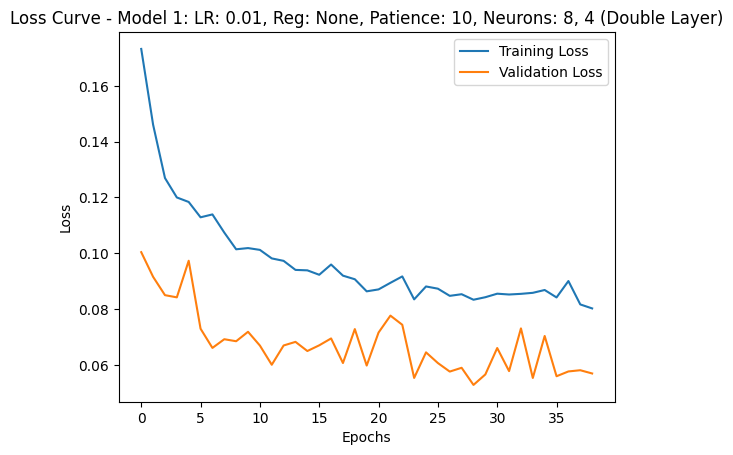

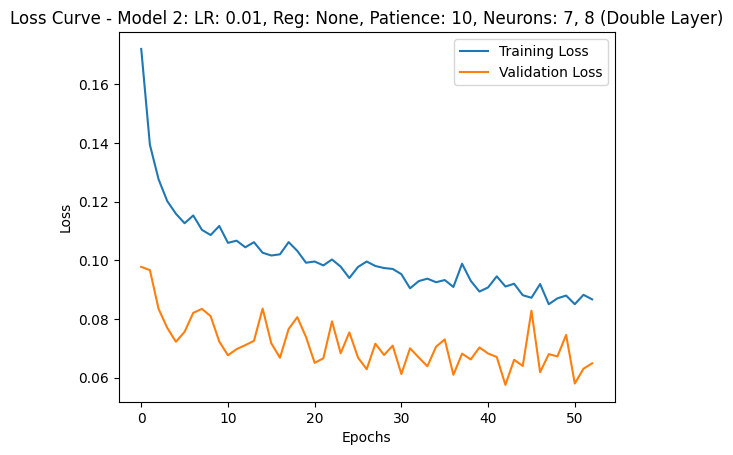

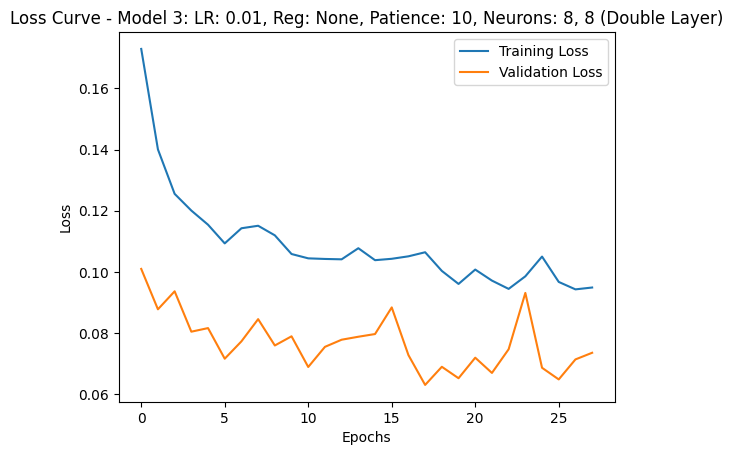

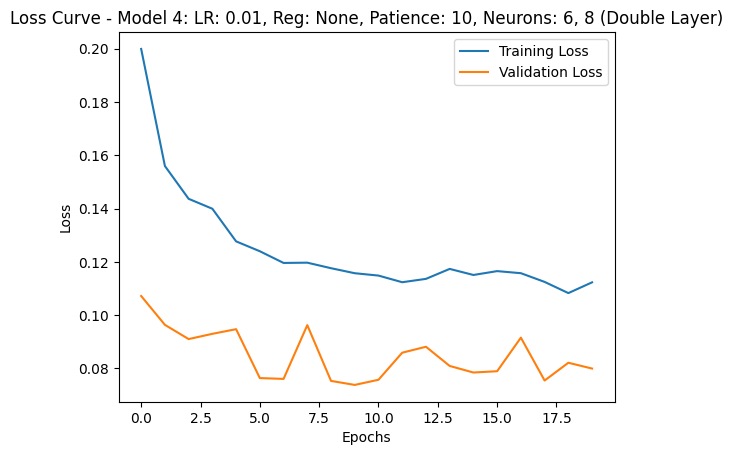

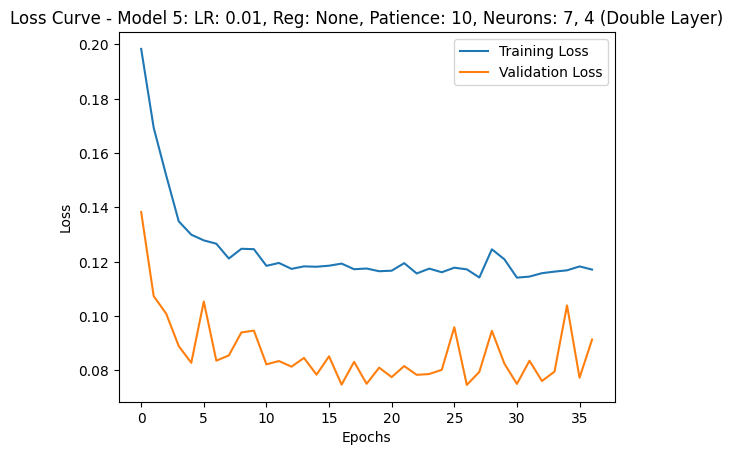

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 1:
 - Recall: 0.7656
 - MSE: 0.0595
 - MAE: 0.0935
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


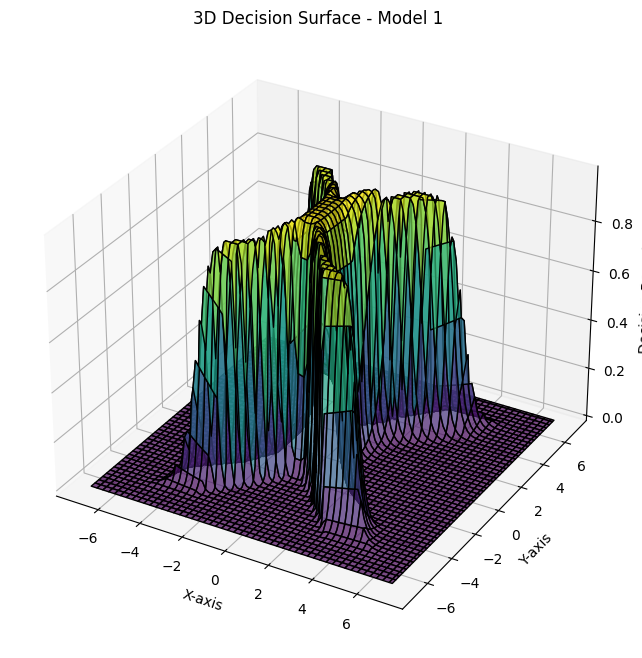

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 2:
 - Recall: 0.7109
 - MSE: 0.0608
 - MAE: 0.1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


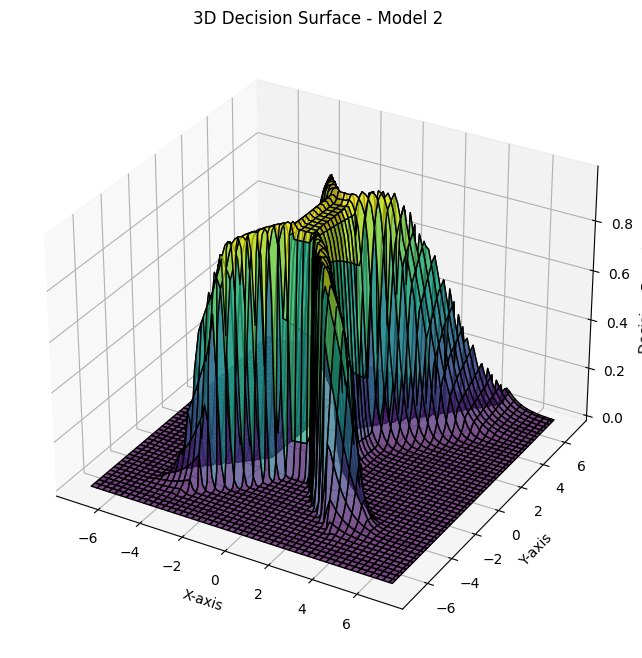

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 3:
 - Recall: 0.7109
 - MSE: 0.0699
 - MAE: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


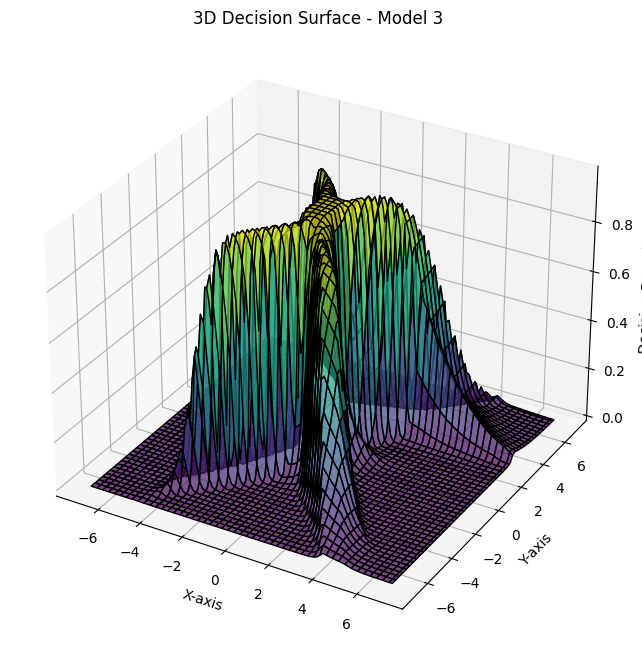

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 4:
 - Recall: 0.6953
 - MSE: 0.0901
 - MAE: 0.1597
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


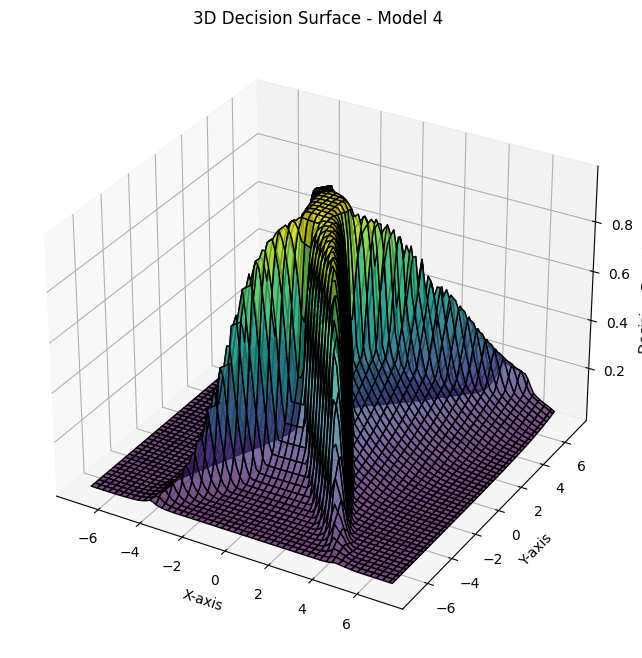

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model 5:
 - Recall: 0.6875
 - MSE: 0.0859
 - MAE: 0.1292
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


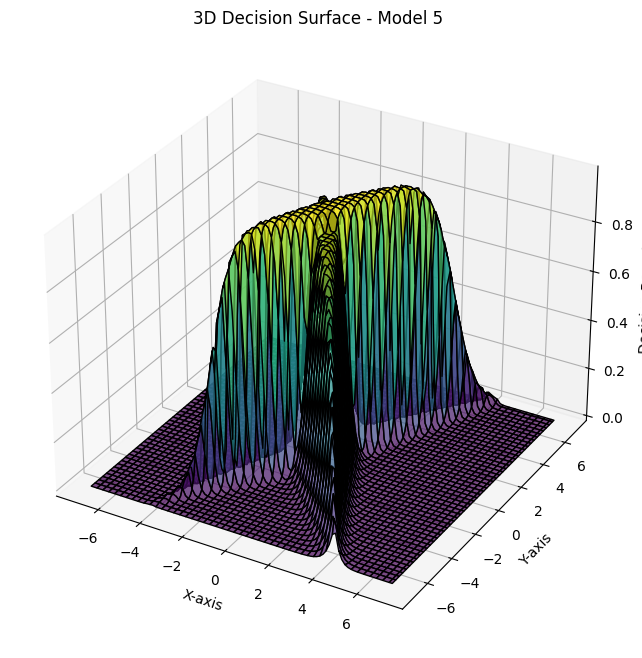

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

# Step 2: Load the dataset
data = pd.read_excel('Parcial_2024_1.xlsx')

# Step 3: Prepare input (X) and output (y) data
X = data[['X', 'Y']].values
y = data['Z'].values

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
neuron_range = range(6, 9)
second_layer_neurons = range(2, 9)
learning_rates = [0.01]
regularizers = [None]
patience_values = [10]

# Track top 5 configurations
top_5_models = []

# Define class weights to prioritize recall
class_weights = {0: 1, 1: 2}

# Iterate through configurations
for lr in learning_rates:
    for reg in regularizers:
        for patience in patience_values:
            # Single hidden layer
            for neurons in neuron_range:
                config_name = f"LR: {lr}, Reg: {reg}, Patience: {patience}, Neurons: {neurons} (Single Layer)"

                model = Sequential()
                model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=reg))
                model.add(Dense(1, activation='sigmoid'))

                adam = Adam(learning_rate=lr)
                model.compile(optimizer=adam, loss='mse', metrics=[Recall()])

                early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

                history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1,
                                    callbacks=[early_stopping], class_weight=class_weights, verbose=0)

                # Evaluate model on test set
                results = model.evaluate(X_test, y_test, verbose=0)
                mse, recall = results[0], results[1]

                top_5_models.append((recall, model, history, neurons, lr, reg, patience, "Single Layer", config_name))
                top_5_models = sorted(top_5_models, key=lambda x: x[0], reverse=True)[:5]

            # Double hidden layer
            for neurons in neuron_range:
                for neurons_2 in second_layer_neurons:
                    config_name = f"LR: {lr}, Reg: {reg}, Patience: {patience}, Neurons: {neurons}, {neurons_2} (Double Layer)"

                    model = Sequential()
                    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=reg))
                    model.add(Dense(neurons_2, activation='relu', kernel_regularizer=reg))
                    model.add(Dense(1, activation='sigmoid'))

                    adam = Adam(learning_rate=lr)
                    model.compile(optimizer=adam, loss='mse', metrics=[Recall()])

                    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

                    history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1,
                                        callbacks=[early_stopping], class_weight=class_weights, verbose=0)

                    # Evaluate model on test set
                    results = model.evaluate(X_test, y_test, verbose=0)
                    mse, recall = results[0], results[1]

                    top_5_models.append((recall, model, history, neurons, lr, reg, patience, "Double Layer", config_name))
                    top_5_models = sorted(top_5_models, key=lambda x: x[0], reverse=True)[:5]

# Display results for top 5 configurations
for model_info in top_5_models:
    recall, model, history, neurons, lr, reg, patience, layer_type, config_name = model_info
    print(f"{config_name} - Recall: {recall:.4f}")

# Plot the loss curve for each of the top 5 models
for i, (recall, model, history, *_, config_name) in enumerate(top_5_models):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve - Model {i+1}: {config_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Evaluate and display metrics for each of the top 5 models
for i, (recall, model, history, *_) in enumerate(top_5_models):
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mse_value = mean_squared_error(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)

    # Print metrics
    print(f"Model {i+1}:")
    print(f" - Recall: {recall:.4f}")
    print(f" - MSE: {mse_value:.4f}")
    print(f" - MAE: {mae_value:.4f}")

    # Visualization: 3D Decision Surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z_pred = model.predict(grid_points).reshape(xx.shape)

    # Plot the 3D surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z_pred, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Decision Boundary")
    plt.title(f'3D Decision Surface - Model {i+1}')
    plt.show()

# Modelo simple 3 capas, muchas neuronas

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2210 - recall: 0.0569 - val_loss: 0.1149 - val_recall: 0.1000
Epoch 2/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1711 - recall: 0.1726 - val_loss: 0.1028 - val_recall: 0.3800
Epoch 3/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1607 - recall: 0.4319 - val_loss: 0.0977 - val_recall: 0.4600
Epoch 4/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1436 - recall: 0.6329 - val_loss: 0.1057 - val_recall: 0.6200
Epoch 5/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1340 - recall: 0.6650 - val_loss: 0.0869 - val_recall: 0.5600
Epoch 6/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1122 - recall: 0.6901 - val_loss: 0.0730 - val_recall: 0.6200
Epoch 7/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1137 - recall: 0.6777 - val_loss: 0.0879 - val_recall: 0.6800
Epoch 8/500
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1105 - recall: 0.7205 - val_loss: 0.0888 - val_recall: 0.6400
Epoch 9/500


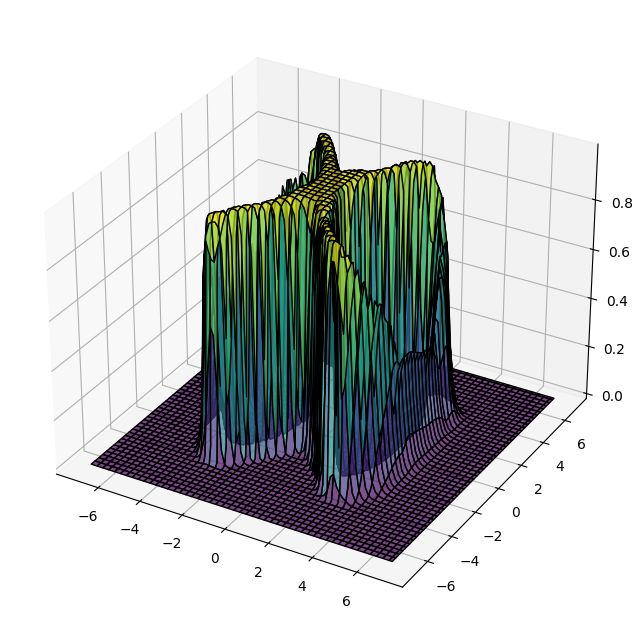

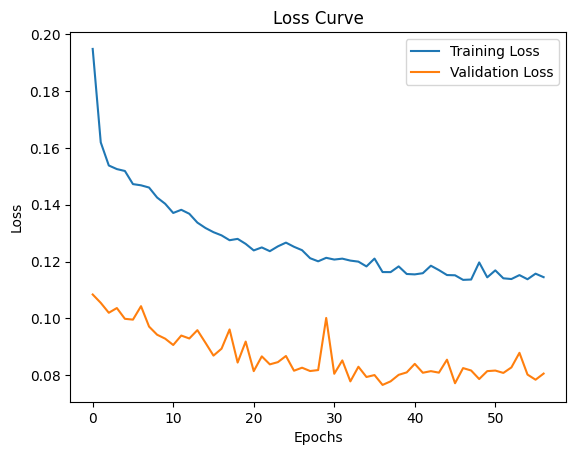

 - Recall: 0.6641
 - MSE: 0.0964


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.models import Model

# Step 2: Load the dataset
data = pd.read_excel('Parcial_2024_1.xlsx')

# Step 3: Prepare input (X) and output (Z) data
X = data[['X', 'Y']].values
y = data['Z'].values

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build the neural network model
model = Sequential()

# Hidden layers
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(30, input_dim=2, activation='relu'))


# Output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))

# Step 7: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['recall'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Define class weights (adjust weights based on your specific data and preference)
class_weights = {0: 1, 1: 2}  # Assign higher weight to class 1 to emphasize recall

# Step 8: Train the model
model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1,
          callbacks=[early_stopping], class_weight=class_weights)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Recall: {recall}')


# Step 1: Generate a grid of points over the range of X and Y for predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 2: Standardize grid points using the same scaler used for training data
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)

# Step 3: Predict the model's output for each point in the grid
Z_pred = model.predict(grid_points_scaled).reshape(xx.shape)

# Step 4: Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z_pred, cmap='viridis', edgecolor='k', alpha=0.7)

# Show the plot
plt.show()



# Plot the loss curve (Corrected indentation)
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

mse_value = mean_squared_error(y_test, y_pred)
# Print metrics
print(f" - Recall: {recall:.4f}")
print(f" - MSE: {mse_value:.4f}")